<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Доверительные-интервалы.-Распределение-Бернулли-с-неизвестной-вероятностью-успеха" data-toc-modified-id="Доверительные-интервалы.-Распределение-Бернулли-с-неизвестной-вероятностью-успеха-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Доверительные интервалы. Распределение Бернулли с неизвестной вероятностью успеха</a></span></li><li><span><a href="#пример-с-выборами" data-toc-modified-id="пример-с-выборами-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>пример с выборами</a></span></li></ul></div>

## Доверительные интервалы. Распределение Бернулли с неизвестной вероятностью успеха

**Задача.** Пусть дана выборка из распределения Бернулли (можно считать, например, это это клики по рекламному баннеру в Интернете) длины $n=290$ и вероятностью успеха, равномерно распределенной на $[0.01,0.05]$. Оценить параметр успеха. Построить для него доверительные интервалы: (1) асимптотический, основанный на центральной предельной теореме, (2) доверительный интервал Уилсона. 

In [1]:
import numpy as np # для генерации случайных величин и работы с массивами
import statsmodels.stats.proportion # для построения доверительных интервалов в модели Бернулли 

In [2]:
np.random.seed(123) # фиксируем seed

In [3]:
# Фиксируем параметры задачи

n = 290 # размер выборки 
alpha = 0.05 # параметр ошибки

p = np.random.uniform(0.01,0.05) # неизвестный параметр успеха

In [4]:
# Сгенерируем выборку из нужного распределения
sample = np.random.binomial(1,p, size=n)

In [5]:
print("Истинное значение параметра: ",p)
print("Оценка вероятности успеха: ",np.mean(sample))

Истинное значение параметра:  0.03785876742391447
Оценка вероятности успеха:  0.04827586206896552


Для того, чтобы построить доверительный интервал в модели Бернулли, можно воспользоваться методом proportion_confint  класса statsmodels.stats.proportion. Подробнее можно прочитать тут: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html

В целом, про доверительные интервалы в модели Бернулли можно почитать либо в английской Википедии: 
https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval  
либо в этой статье:  
http://medstatistic.ru/articles/doveritelnye-intervaly-dlya-chastot-i-doley.pdf

In [6]:
CI_Normal = statsmodels.stats.proportion.proportion_confint(sum(sample), n, alpha, method = 'normal')
print("Асимптотический доверительный интервал на основе ЦПТ равен ", CI_Normal)

Асимптотический доверительный интервал на основе ЦПТ равен  (0.02360583346469502, 0.07294589067323601)


In [7]:
CI_Wilson = statsmodels.stats.proportion.proportion_confint(sum(sample), n, alpha, method = 'wilson')
print("Доверительный интервал Уилсона равен ", CI_Wilson)

Доверительный интервал Уилсона равен  (0.02897166404273002, 0.07939105287436846)


## пример с выборами

In [8]:
0.55 + 1.96*(0.55*0.45/100)**0.5

0.6475087688364488

In [9]:
0.55 - 1.96*(0.55*0.45/100)**0.5

0.4524912311635513

In [10]:
z = 1.96
p_win = 0.5
mean = 0.55

((z*(mean*(1-mean))**0.5)/(mean-p_win))**2

380.3183999999994

In [11]:
n = 100 
print(0.55 - 1.96*(0.55*0.45/n)**0.5)
print(0.55 + 1.96*(0.55*0.45/n)**0.5)

0.4524912311635513
0.6475087688364488


In [12]:
n = 381000
print(0.55 - 1.96*(0.55*0.45/n)**0.5)
print(0.55 + 1.96*(0.55*0.45/n)**0.5)

0.5484202761130327
0.5515797238869674


In [13]:
import matplotlib.pyplot as plt

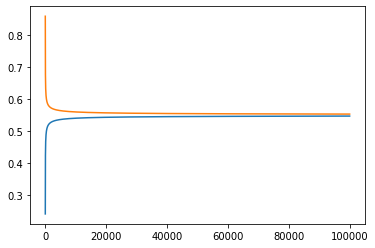

In [14]:
xr = range(10,100000,10)
plt.plot(xr,[0.55 - 1.96*(0.55*0.45/x)**0.5 for x in xr])
plt.plot(xr,[0.55 + 1.96*(0.55*0.45/x)**0.5 for x in xr])
plt.show()